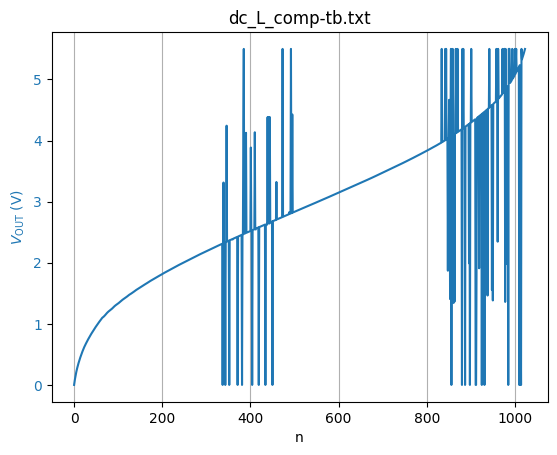

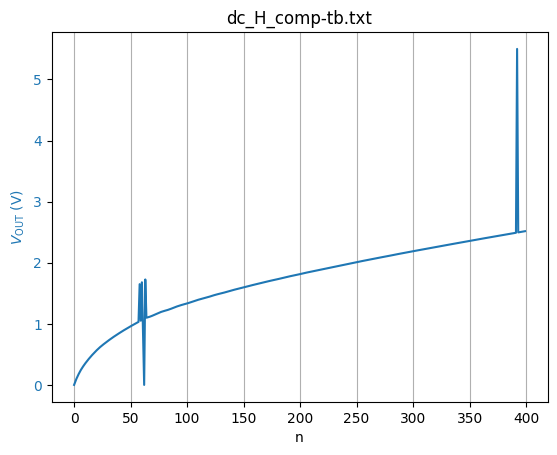

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

txt_file = ['dc_L_comp-tb.txt', 'dc_H_comp-tb.txt']
color = ['tab:blue', 'tab:red']

for idx, i in enumerate(txt_file):
    df_raw = pd.read_csv(txt_file[idx], sep=r'\s+')
    par_names = df_raw.columns.to_list()
    vout = df_raw['voutval']
    n = df_raw['ndata']
    fig, ax1 = plt.subplots()
    ax1.grid(axis='x')
    ax1.set_xlabel('n')
    color = 'tab:blue'
    ax1.set_ylabel(r'$V_\mathrm{OUT}$ (V)', color=color)
    ax1.plot(n, vout, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_title(txt_file[idx])
#df = df_raw.drop(['v-sweep'], axis=1)
#fig.savefig("dc_best1", bbox_inches='tight', dpi=300)